In [2]:
from tensorflow import keras
(train_input, train_target),(test_input, test_target) =\
keras.datasets.mnist.load_data()

In [3]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
# 모델 생성
model = keras.Sequential()
# 은닉층
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
# 출력층
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
# 모델 정보 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 모델 설정
model.compile(loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# 모델 훈련
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 59us/sample - loss: 0.4272 - accuracy: 0.8899
Epoch 2/5
48000/48000 [==============================] - 2s 48us/sample - loss: 0.2214 - accuracy: 0.9360
Epoch 3/5
48000/48000 [==============================] - 2s 49us/sample - loss: 0.1743 - accuracy: 0.9486
Epoch 4/5
48000/48000 [==============================] - 2s 48us/sample - loss: 0.1442 - accuracy: 0.9575
Epoch 5/5
48000/48000 [==============================] - 2s 50us/sample - loss: 0.1239 - accuracy: 0.9636


In [7]:
# 모델 생성
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(train_scaled, train_target, batch_size=100, epochs=10)

Train on 48000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 44us/sample - loss: 0.3203 - accuracy: 0.9028
Epoch 2/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.1173 - accuracy: 0.9643
Epoch 3/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.0812 - accuracy: 0.9751
Epoch 4/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.0605 - accuracy: 0.9810
Epoch 5/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.0457 - accuracy: 0.9860
Epoch 6/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.0373 - accuracy: 0.9886
Epoch 7/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.0293 - accuracy: 0.9908
Epoch 8/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.0231 - accuracy: 0.9931
Epoch 9/10
48000/48000 [==============================] - 2s 35us/sample - loss: 0.0203 - accuracy: 0.9939
Epoch 10/10
48

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

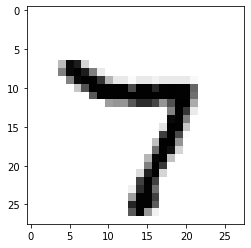

In [36]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [37]:
preds = model.predict(val_scaled[0:1])
preds

array([[3.8075173e-18, 1.3969538e-10, 2.6230628e-14, 7.3278839e-17,
        2.7335246e-16, 7.3148131e-17, 1.3453740e-24, 1.0000000e+00,
        1.8894014e-13, 4.3516392e-11]], dtype=float32)